# Milestone 5 Poiseuille flow
Todo:
- y-Direction: bounce-back boundary
- x-Direction: periodic boundary conditions with pressure variation (need extra layer of nodes outside the physical domain)
- observe flow field with a streamline-plot
- compute area of the velocity profile at the inlet and in the middle of the channel (are they the same, what is different?)
--> soll einfach das parabolische niveau am anfang mitte und ende anschauen und das vergleichen
--> mitte sollte schön parabolisch sein anfang eher als probpfen
- plot density along the centerline of the channel $ρ(x,h/2)$
--> uns interessiert nur die ableitung, können es aber ander y-achse entlang schieben
- evolution of the velocity profile from the beginning into the stready-state (with an analytical solution)

In [1]:

from source.algorithms.latticeBoltzman import LatticeBoltzmannMethod 
import source.algorithms.BoundaryCondition as bc
from source.data.ExperimentData import ExperimentVar
import numpy as np
import source.data.CommonDefinitions as cd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import simps
from matplotlib.pyplot import cm

In [2]:

var = ExperimentVar()
X =  500 #var.lattice_shape[0]
Y =  60 #var.lattice_shape[1]
plt.style.use('classic')
density_in = 1.01
density_out = 0.99
time_steps = 70000

In [3]:


velo_timesteps = np.arange(1,20,1)
velocities = np.zeros((velo_timesteps.shape[0], Y,X))
densities = np.zeros((velo_timesteps.shape[0], X))
def callback(lattice: LatticeBoltzmannMethod, t: int) -> None:
    idx = np.log10(t)/np.log10(2) 
    if idx in velo_timesteps:
        print(idx)
        velocities[int(idx)] = lattice.getVelocity()[1]
        densities[int(idx)] = lattice.getDensity()[Y//2, :]

In [4]:

density_field = np.ones((Y, X))
lattice_pdf = LatticeBoltzmannMethod(X, Y, omega=1 , init_density=density_field, init_plot=False)
boundary_list =[]
boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.BOTTOM, lattice=lattice_pdf))
# boundary_list.append(bc.MovingWall(boundaryAlignment=cd.BoundaryAlignments.TOP, lattice=lattice_pdf, wall_velo=np.array([1,0])))
boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.TOP, lattice=lattice_pdf))
boundary_list.append(bc.PeriodicWithPressure(boundaryAlignment=cd.BoundaryAlignments.LEFT, boundaryAlignment2=cd.BoundaryAlignments.RIGHT,
 lattice=lattice_pdf, density_inlet=density_in, density_outlet=density_out))
boundary_handling = bc.BoundaryHandlings(boundary_conditions=boundary_list)

lattice_pdf.execute(time_steps, boundary=boundary_handling, callback=callback)
    

Rigid Wall at BoundaryAlignments.BOTTOM
Rigid Wall at BoundaryAlignments.TOP
Pressurevariant Wall at BoundaryAlignments.LEFT and BoundaryAlignments.RIGHT
0
1.0
1.0000000000000002
1.0000000441412813
1.0
1.0000001030404522
1.000000186201275
2.0
1.0000002853745749


C:\Users\Raphael\AppData\Local\Temp\ipykernel_15388\4049403586.py:5: RuntimeWarning: divide by zero encountered in log10
  idx = np.log10(t)/np.log10(2)


1.0000004007894325
1.0000005296569507
1.0000006706701965
3.0
1.0000008219169008
1.0000009818365598
1.0000011489054679
1.0000013218474681
1.0000014995697537
1.0000016811585246
1.0000018658797205
1.0000020530980822
4.0
1.0000022423351116
1.000002433146519
1.0000026252299488
1.0000028182708218
1.0000030120880867
1.0000032064553739
1.0000034012743784
1.0000035963780924
1.0000037917236209
1.0000039871833533
1.0000041827507775
1.0000043783242005
1.000004573920566
1.0000047694552117
1.0000049649599045
1.0000051603612468
5.0
1.0000053557001283
1.000005550910719
1.0000057460392917
1.0000059410252347
1.0000061359177679
1.0000063306600142
1.0000065253025665
1.0000067197913505
1.0000069141773207
1.0000071084086235
1.0000073025359313
1.0000074965092454
1.000007690378553
1.0000078840954765
1.0000080777090723
1.0000082711724307
1.000008464533533
1.0000086577468321
1.0000088508591545
1.0000090438262421
1.0000092366937285
1.0000094294185857
1.0000096220452452
1.0000098145318614
1.000010006921673
1.0000

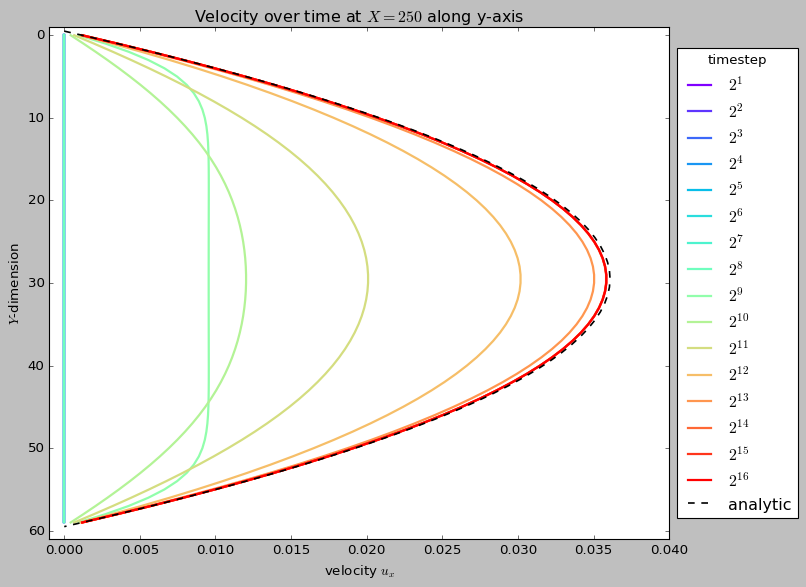

In [5]:
y_values = np.arange(Y)
velo_timesteps = np.arange(1,17,1)
fig, ax = plt.subplots(figsize=(10,8))
colors = cm.rainbow(np.linspace(0, 1, len(velo_timesteps)))
for timestep, color in zip(velo_timesteps, colors):
    ax.plot(velocities[int(timestep),:, X//2], np.arange(0,Y,1), c=color, linewidth=2, label="$2^{%i}$"%timestep)
   
"""
dp = ρ_in * c_s^2 - p_out
p_out = ρ_out * c_s^2
dp = (ρ_out-ρ_in) * c_s^2
dx = X
c_s^2 = 1/3
"""
y_values = np.arange(Y+1)
dp_dx = (density_out - density_in) / ((X-2) * 3.0)
x_analytic = -0.5 *  dp_dx * y_values * (Y - y_values)  /(lattice_pdf.getDensity()[:, X//2].mean()*cd.get_viscosity(omega=var.omega))
ax.plot(x_analytic, y_values-0.5, '--k', linewidth=1.5, label="analytic")
ax.set_xlabel("velocity $u_x$")
ax.set_ylabel("$Y$-dimension")
ax.set_ylim(Y+1, -1)
ax.set_xlim(-0.001)
# ax.set_xlim(0, 0.12)
plt.title("Velocity over time at $X = {}$ along y-axis".format(X//2))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="timestep")
plt.savefig(f'figures/Milestone5/PoiseuilleFlow.png', bbox_inches='tight')
plt.show()

### velocity at first column


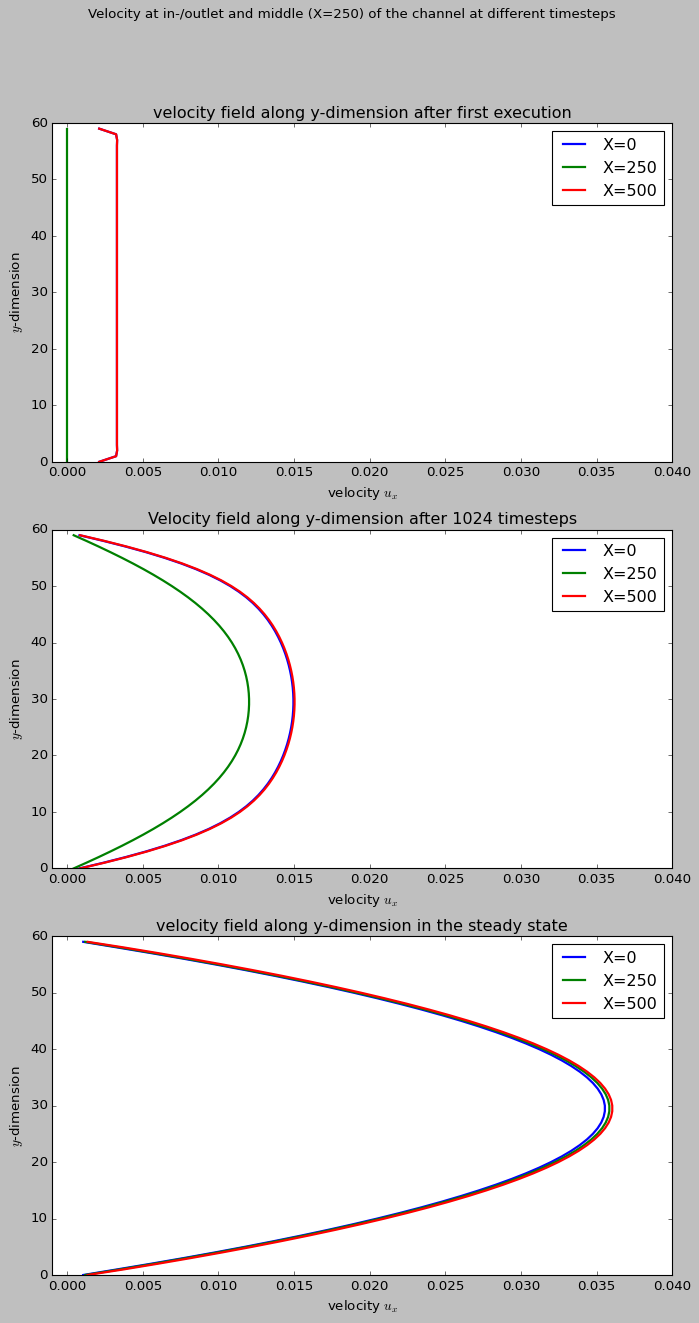

In [6]:
fig,ax = plt.subplots(3,1, figsize=(10,18))
timestep1 = 1
timestep2 = 10
timestep3 = 16
fig.suptitle("Velocity at in-/outlet and middle (X=250) of the channel at different timesteps")

plt.subplot(3,1,1)
plt.title("velocity field along y-dimension after first execution")
plt.plot(velocities[timestep1, :, 1], range(0,Y) , linewidth=2, label="X=0")
plt.plot(velocities[timestep1, :, X//2], range(0,Y) , linewidth=2, label="X={}".format(X//2))
plt.plot(velocities[timestep1, :, X-2], range(0,Y) , linewidth=2, label="X={}".format(X))
plt.legend()
plt.xlabel("velocity $u_x$")
plt.ylabel("$y$-dimension")
plt.xlim(-0.001, 0.04)

plt.subplot(3,1,2)
plt.title("Velocity field along y-dimension after {} timesteps".format(2**timestep2))
plt.plot(velocities[timestep2, :, 1], range(0,Y) , linewidth=2, label="X=0")
plt.plot(velocities[timestep2, :, X//2], range(0,Y) , linewidth=2, label="X={}".format(X//2))
plt.plot(velocities[timestep2, :, X-2], range(0,Y) , linewidth=2, label="X={}".format(X))
plt.legend()
plt.xlabel("velocity $u_x$")
plt.ylabel("$y$-dimension")
plt.xlim(-0.001, 0.04)

plt.subplot(3,1,3)
plt.title("velocity field along y-dimension in the steady state".format(2**timestep3))
plt.plot(velocities[timestep3, :, 1], range(0,Y) , linewidth=2, label="X=0")
plt.plot(velocities[timestep3, :, X//2], range(0,Y) , linewidth=2, label="X={}".format(X//2))
plt.plot(velocities[timestep3, :, X-2], range(0,Y) , linewidth=2, label="X={}".format(X))
plt.legend()
plt.xlabel("velocity $u_x$")
plt.ylabel("$y$-dimension")
plt.xlim(-0.001, 0.04)
plt.savefig(f'figures/Milestone5/PoiseuilleFlowCompareColumns.png', bbox_inches='tight')
plt.show()

In [7]:

# fig, ax = plt.subplots(figsize=(10,8))
# color = cm.rainbow(np.linspace(0, 1, len(velo_timesteps)))
# for timestep,col in zip(velo_timesteps, color):
#     ax.plot(velocities[int(timestep), :, 1], range(0, Y), c=col, linestyle="--", linewidth=4)
#     ax.plot(velocities[int(timestep), :, X//2], range(0, Y), c=col, label="$2^{%i}$"%timestep)
   
# ax.set_xlabel("velocity $u_x$")
# ax.set_ylabel("Y-Axis")
# ax.set_ylim(Y, 0)
# ax.set_xlim(0, 0.12)
# plt.title("velocitie compared at x={} (dotted) and x = {} (line)".format(1, X//2))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="timestep")
# plt.savefig(f'figures/Milestone5/PoiseuilleFlowCompareColumns.png', bbox_inches='tight')
# plt.show()

In [8]:

# # velo_timesteps = np.arange(1,17,1)
# fig, ax = plt.subplots(figsize=(10,8))
# color = cm.rainbow(np.linspace(0, 1, len(velo_timesteps)))
# area_at_0 = np.zeros((velo_timesteps.shape[0]))
# area_at_half = np.zeros((velo_timesteps.shape[0]))
# area_at_half
# for idx, timestep in enumerate(velo_timesteps):
#     area_at_0[idx] = np.sum(velocities[int(timestep), :, 0])
#     area_at_half[idx] = np.sum(velocities[int(timestep), :, X//2])
#     # ax.plot(velo_timesteps, trapz(velocities[int(timestep), :, X//2], dx=1))
# newarray = [2**element  for element in velo_timesteps]
# ax.plot(newarray, area_at_0, label="at zero")
# ax.plot(newarray, area_at_half, label="at half")
# plt.xscale("log")
# plt.legend()
# plt.show()

### density along the centerline of the channel $ρ(x,h/2)$

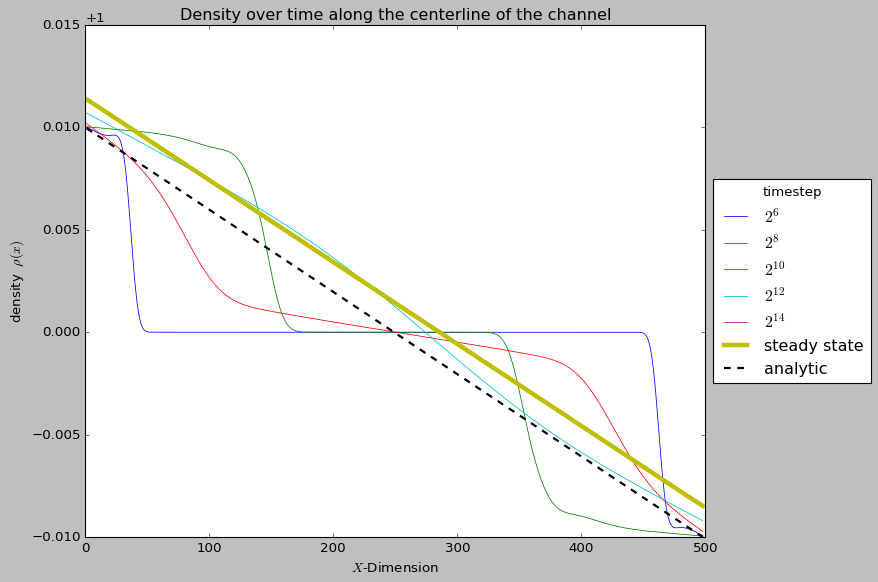

In [9]:

velo_timesteps = np.arange(6,18,2)
y_values = np.arange(Y)
fig, ax = plt.subplots(figsize=(10,8))
for timestep in velo_timesteps:
    if timestep == 16:
        ax.plot( range(1, X-1), densities[timestep, 1:X-1], label="steady state", linewidth=4)
    else:
        ax.plot( range(1, X-1), densities[timestep, 1:X-1], label="$2^{%i}$"%timestep, linewidth=.7)
ax.set_ylabel("density  $ρ(x)$")
ax.set_xlabel("$X$-Dimension")
ax.set_xlim(0, X)
plt.title("Density over time along the centerline of the channel".format(Y//2))

x_axis = range(1,X-1)
y_analytic = [((-0.02/(X-2))*single_x +1.01) for single_x in x_axis]
ax.plot( x_axis, y_analytic, '--k', linewidth=2, label="analytic")


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="timestep")
plt.savefig(f'figures/Milestone5/DensityAtCenter.png', bbox_inches='tight')

plt.show()

## streamplot

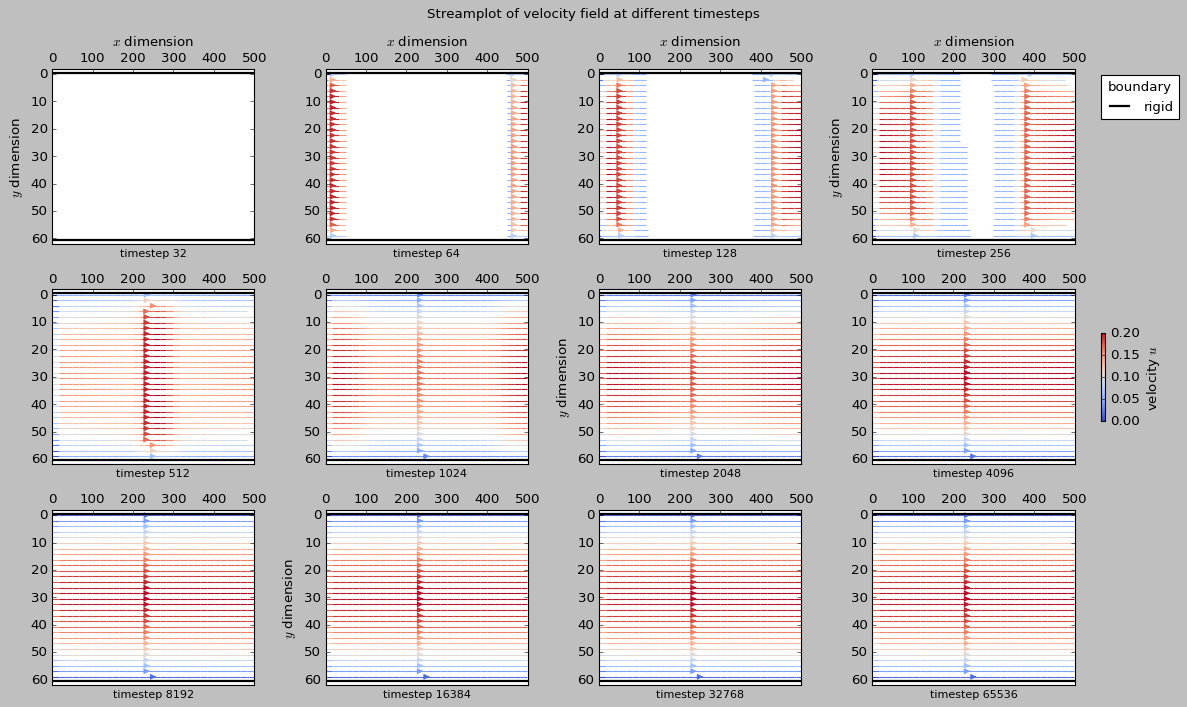

In [13]:
rows, columns = 3,4
cmap = "warm"
fig, ax = plt.subplots(rows, columns, figsize=(15,9))
fig.suptitle("Streamplot of velocity field at different timesteps")
axis = ax.flatten()
x, y = np.meshgrid(np.arange(X), np.arange(Y))
cmap = "coolwarm"
velo_timesteps = np.arange(5,17,1)
for idx, time in enumerate(velo_timesteps):
    plt.subplot(rows, columns, idx+1)
    plt.title("timestep {}".format(2**time), size=10, y=-0.1)
    plt.xlim(0, X)
    if idx < columns:
        plt.xlabel('$x$ dimension')
    if idx % rows == 0:
        plt.ylabel('$y$ dimension')
    plt.ylim(-2, Y+2)
    vy = np.zeros((Y,X))
    # print(time)
    vx = velocities[time, :, :]
    plt.streamplot(x, y, vx, vy, color=vx, density =1, cmap=cmap)
    plt.plot(range(X), np.ones((X))*(Y+0.5), 'k', linewidth=2, label="rigid")
    plt.plot(range(X), np.ones((X))*(-0.5), 'k', linewidth=2)
    plt.xticks(np.arange(0, X+1, 100.0))
axis[columns-1].legend(title="boundary", bbox_to_anchor=(1.55, 1), loc='upper right', prop={'size':12})
for single_axs in axis:
    single_axs.invert_yaxis()
    single_axs.xaxis.tick_top()
    single_axs.xaxis.set_label_position("top")
color_norm = mpl.colors.Normalize(vmin=0.0, vmax=0.2)
fig.tight_layout()
p = axis[columns-1+rows].get_position()
fig.colorbar(mpl.cm.ScalarMappable(norm=color_norm, cmap=cmap), \
    ax=fig.add_axes([p.x0+0.275, p.y0,p.width, p.height], visible=False), label='velocity $u$', shrink=0.5)
plt.savefig(f'figures/Milestone5/StreamplotPoiseuille.png', bbox_inches='tight')
plt.show()